# 加载读取数据集
数据集网站：http://yann.lecun.com/exdb/mnist/

框图网站：http://alexlenail.me/NN-SVG/index.html

In [1]:
import numpy as np
data=np.loadtxt('mnist_test.csv',delimiter=',')

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [7]:
feature=data[:,1:]
len(feature[1,:])

784

In [6]:
len(data[1,:])

785

# 数据的可视化

<IPython.core.display.Javascript object>


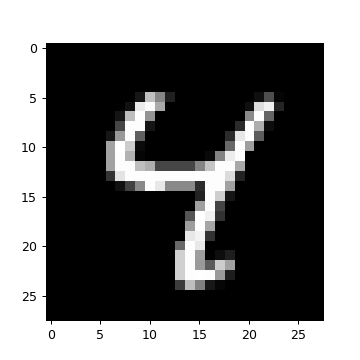

In [12]:
import matplotlib.pyplot as plt
%matplotlib notebook
fig=plt.figure(figsize=(4,4),dpi=60)
plt.imshow(feature[6].reshape(28,28),cmap='gray')

## 关键步骤：自己动手制作数据集
1.手写数字

2.拍照

3.OpenCV缩放成28×28

4.OpenCV转换成灰度图

5.打标签

6.重复1~5的步骤，知直到完成60000个数据的收集和1万个测试集的收集

* 花钱  
百度搜索：数据众包
* 写代码  
自己做  
* 数据集可能比算法还重要

## 训练数据，生成模型

In [51]:
import numpy as np
data=np.loadtxt('mnist_train10000.csv',delimiter=',')

In [52]:
feature=data[:1000,1:]
feature.shape

(1000, 784)

### 获取数据的label

In [53]:
label=data[:1000,0:1].astype(int)
label.T[0]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2,
       9, 3, 1, 1, 0, 4, 9, 2, 0, 0, 2, 0, 2, 7, 1, 8, 6, 4, 1, 6, 3, 4,
       5, 9, 1, 3, 3, 8, 5, 4, 7, 7, 4, 2, 8, 5, 8, 6, 7, 3, 4, 6, 1, 9,
       9, 6, 0, 3, 7, 2, 8, 2, 9, 4, 4, 6, 4, 9, 7, 0, 9, 2, 9, 5, 1, 5,
       9, 1, 2, 3, 2, 3, 5, 9, 1, 7, 6, 2, 8, 2, 2, 5, 0, 7, 4, 9, 7, 8,
       3, 2, 1, 1, 8, 3, 6, 1, 0, 3, 1, 0, 0, 1, 7, 2, 7, 3, 0, 4, 6, 5,
       2, 6, 4, 7, 1, 8, 9, 9, 3, 0, 7, 1, 0, 2, 0, 3, 5, 4, 6, 5, 8, 6,
       3, 7, 5, 8, 0, 9, 1, 0, 3, 1, 2, 2, 3, 3, 6, 4, 7, 5, 0, 6, 2, 7,
       9, 8, 5, 9, 2, 1, 1, 4, 4, 5, 6, 4, 1, 2, 5, 3, 9, 3, 9, 0, 5, 9,
       6, 5, 7, 4, 1, 3, 4, 0, 4, 8, 0, 4, 3, 6, 8,

In [54]:
# 独热编码后的数据
Label=np.eye(10)[label.T[0]]

In [55]:
# 数据归一化 并且拼接上一列1
Feature=np.hstack((feature/255.0,np.ones((len(feature),1))))
Feature

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [56]:
# m1 m2 m3  ... m784 b
# 10种类别，0,1,2,3,4,5,6,7,8,9
Weight=np.ones((785,10))
#记录mse对m和b变化率的惯性
m=np.zeros((785,10))
#记录mse对m和b变化率的速度
v=np.zeros((785,10))
learningrate = 0.001

def sigmoid(z):
    return 1/(1+np.exp(-z))

def gradentdecent():
    global Weight,m,v
    #计算的是m和b的梯度
    slop=np.dot(Feature.T,(sigmoid(np.dot(Feature,Weight))-Label))
    #核心逻辑，Adam    
    beta_1=0.9
    beta_2=0.999    
    m=beta_1*m+(1-beta_1)*slop
    v=beta_2*v+(1-beta_2)*(slop**2)    
    m_p=m/(1-beta_1)
    v_p=v/(1-beta_2)    
    Weight=Weight-learningrate*m_p/np.sqrt(v_p+0.000000001)
    return slop


for i in range(100000):
    slop=gradentdecent()
    totalslop=np.sum(np.square(slop))
    if totalslop<50:
        print("i={},totalslop：{}".format(i,totalslop))
        break


i=14703,totalslop：49.98625427661585


<IPython.core.display.Javascript object>


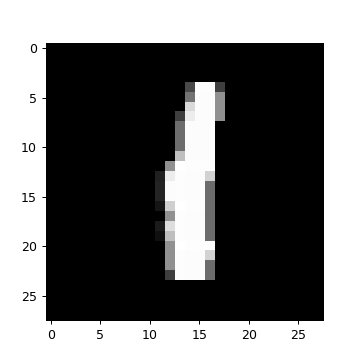

In [57]:
import matplotlib.pyplot as plt
%matplotlib notebook
fig=plt.figure(figsize=(4,4),dpi=60)
plt.imshow(feature[128].reshape(28,28),cmap='gray')

In [58]:
np.set_printoptions(suppress=True)
np.exp(np.dot(Feature[128],Weight))/np.sum(np.exp(np.dot(Feature[128],Weight)))

array([0.        , 0.9998807 , 0.00000107, 0.00002379, 0.00000014,
       0.00000018, 0.00000033, 0.        , 0.00009239, 0.0000014 ])

<IPython.core.display.Javascript object>


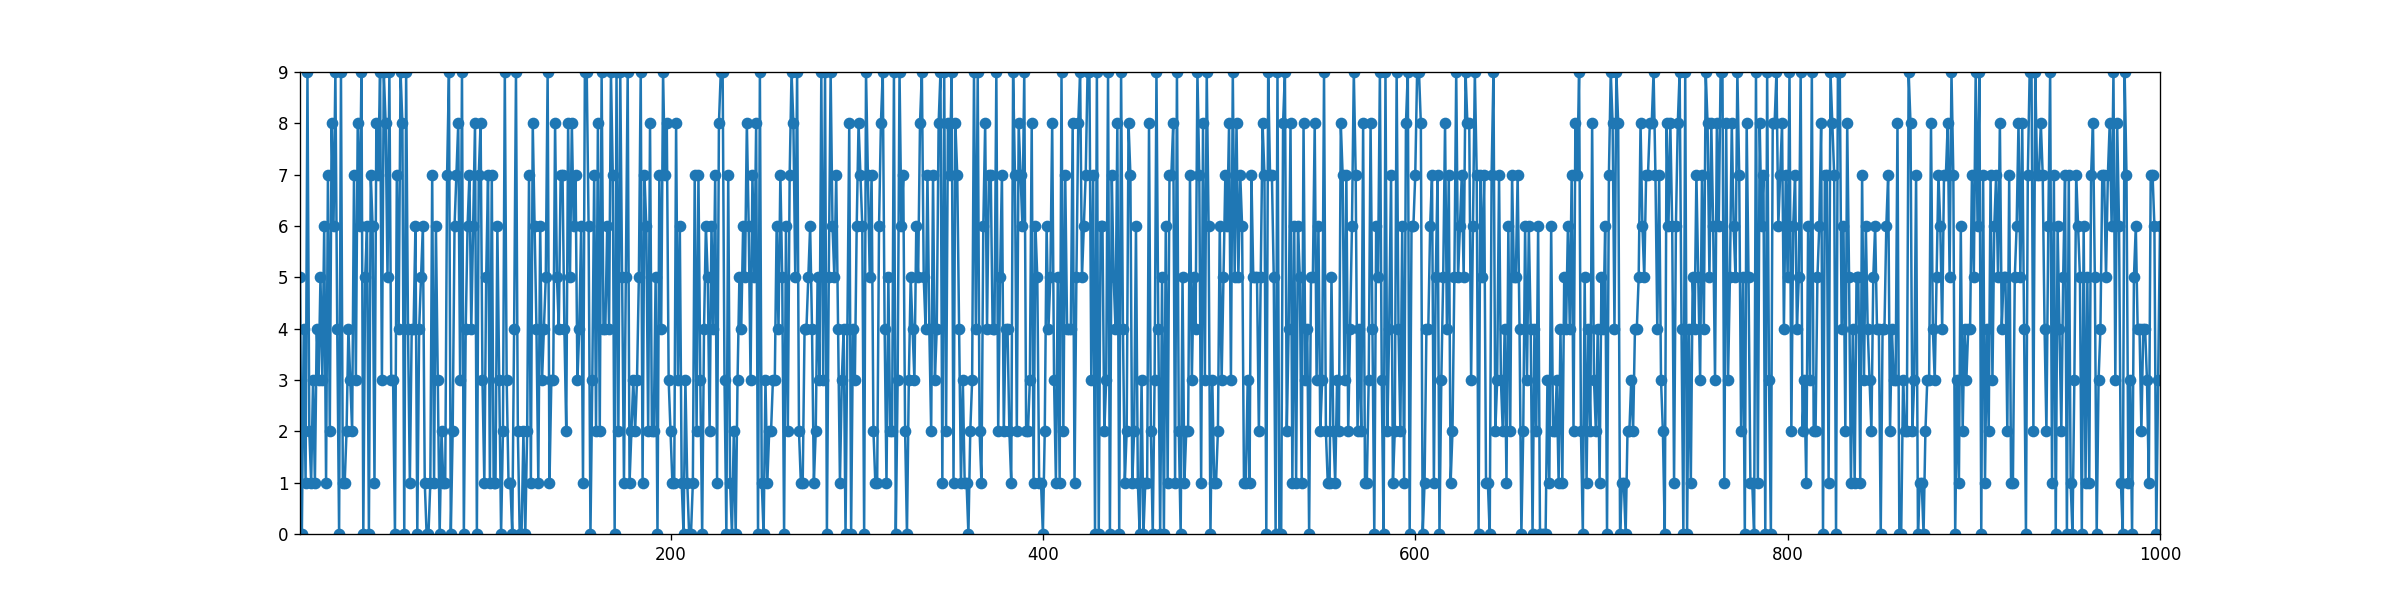

In [66]:
y=[]
x=np.linspace(1,1000,1000)
for i in range(len(x)):
    a=np.argmax(np.exp((np.dot(Feature[i],Weight)))/np.sum(np.exp((np.dot(Feature[i],Weight)))))
    y.append(a)
    
import matplotlib.pyplot as plt
%matplotlib notebook
fig = plt.figure(figsize=(20, 5), dpi=80)
plt.xlim(1, 1000.0)  # Set x limits
plt.ylim(0, 9)  # Set y limits
plt.scatter(x,y)
plt.plot(x,label)
#plt.scatter(x[:10],y[:10])
#plt.plot(x[:10],label[:10])
plt.show()

In [49]:
np.linspace(1,1000,1000)

array([   1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,    9.,
         10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,   18.,
         19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,   27.,
         28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,   36.,
         37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,   45.,
         46.,   47.,   48.,   49.,   50.,   51.,   52.,   53.,   54.,
         55.,   56.,   57.,   58.,   59.,   60.,   61.,   62.,   63.,
         64.,   65.,   66.,   67.,   68.,   69.,   70.,   71.,   72.,
         73.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,   81.,
         82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,   90.,
         91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,   99.,
        100.,  101.,  102.,  103.,  104.,  105.,  106.,  107.,  108.,
        109.,  110.,  111.,  112.,  113.,  114.,  115.,  116.,  117.,
        118.,  119.,  120.,  121.,  122.,  123.,  124.,  125.,  126.,
        127.,  128.,